# Hand Written Digit Prediction- Classification Analysis



The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

# Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Import Data

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

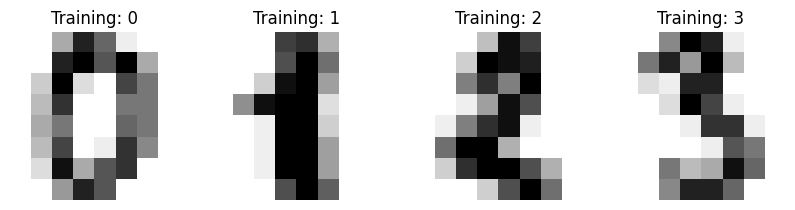

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# Data Preprocessing

Flatten Image

In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [12]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

# Scalling Image Data

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [18]:
data= data/16

In [19]:
data.min()

0.0

In [20]:
data.max()

1.0

In [21]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(x_train, y_train)

RandomForestClassifier()

# Predict Test Data

In [29]:
y_pred = rf.predict(x_test)

In [30]:
y_pred

array([1, 7, 1, 7, 1, 8, 1, 6, 4, 0, 8, 2, 2, 4, 3, 2, 5, 5, 3, 9, 1, 3,
       1, 1, 4, 5, 8, 1, 4, 2, 1, 1, 0, 3, 3, 5, 6, 6, 5, 3, 7, 9, 9, 5,
       9, 2, 4, 9, 6, 5, 5, 8, 2, 5, 0, 1, 4, 4, 9, 1, 5, 5, 8, 0, 2, 7,
       2, 7, 6, 2, 9, 9, 4, 7, 0, 2, 2, 2, 6, 4, 1, 7, 0, 3, 1, 2, 5, 0,
       0, 0, 9, 2, 6, 6, 3, 4, 4, 1, 3, 2, 4, 2, 0, 9, 3, 7, 4, 8, 6, 6,
       3, 2, 1, 7, 8, 8, 8, 1, 3, 1, 6, 3, 2, 5, 6, 3, 2, 3, 2, 1, 5, 2,
       1, 7, 0, 8, 3, 6, 6, 4, 2, 9, 7, 0, 6, 8, 1, 0, 0, 0, 9, 5, 4, 7,
       7, 8, 3, 5, 8, 3, 6, 6, 8, 1, 0, 4, 9, 7, 0, 5, 2, 0, 7, 0, 5, 1,
       9, 4, 4, 2, 4, 8, 1, 1, 0, 3, 4, 3, 1, 2, 0, 5, 3, 7, 0, 7, 5, 8,
       4, 2, 9, 8, 7, 4, 1, 7, 6, 9, 8, 0, 2, 4, 1, 4, 9, 7, 3, 0, 8, 0,
       1, 9, 9, 6, 9, 5, 0, 8, 3, 8, 4, 3, 6, 4, 1, 1, 9, 2, 8, 7, 6, 3,
       1, 5, 5, 9, 8, 3, 0, 9, 7, 9, 4, 4, 5, 5, 9, 0, 2, 5, 9, 8, 7, 4,
       5, 8, 7, 9, 5, 4, 9, 7, 0, 4, 3, 1, 6, 8, 8, 2, 9, 7, 8, 6, 0, 6,
       1, 5, 7, 6, 7, 6, 1, 2, 3, 8, 6, 9, 3, 0, 8,

# Model Accuracy

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
confusion_matrix(y_test, y_pred)

array([[62,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 51,  0,  0,  1,  1],
       [ 0,  2,  0,  0,  0,  0, 63,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  2,  0,  0,  1,  1,  0,  1, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 50]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.93      1.00      0.96        54
           2       1.00      1.00      1.00        46
           3       1.00      0.98      0.99        55
           4       0.94      0.98      0.96        49
           5       0.96      0.94      0.95        54
           6       1.00      0.97      0.98        65
           7       0.95      1.00      0.97        52
           8       0.98      0.90      0.94        51
           9       0.98      0.98      0.98        51

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

